<a href="https://colab.research.google.com/github/Udbhavbisarya23/StockPrediction/blob/main/Node2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pandas
!pip3 install openpyxl
!pip3 install networkx
!pip3 install node2vec
!pip3 install numpy
!pip3 install stellargraph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel("/content/drive/MyDrive/Datasets/Corporation_network.xlsx","Sheet1")
print(df)

    Unnamed: 0         A       AAL  ...      ZBRA      ZION       ZTS
0            A  0.000000  0.213315  ...  0.230499  0.292645  0.277432
1          AAL  0.213315  0.000000  ...  0.205259  0.211573  0.194883
2          AAP  0.209926  0.202833  ...  0.219511  0.225825  0.209135
3         AAPL  0.249060  0.208419  ...  0.220815  0.204694  0.227457
4         ABBV  0.262888  0.219896  ...  0.252338  0.235036  0.241104
..         ...       ...       ...  ...       ...       ...       ...
498        YUM  0.302889  0.200898  ...  0.227980  0.233156  0.278413
499        ZBH  0.260228  0.216775  ...  0.252245  0.278336  0.231823
500       ZBRA  0.230499  0.205259  ...  0.000000  0.250024  0.236171
501       ZION  0.292645  0.211573  ...  0.250024  0.000000  0.217875
502        ZTS  0.277432  0.194883  ...  0.236171  0.217875  0.000000

[503 rows x 504 columns]


#Creating a networkx graph and then using the graph to create node embeddings, and using these embeddings to find nearest neighbors or most similar companies for a stock


In [ ]:
import networkx as nx
from node2vec import Node2Vec

# Numpy array from dataframe
np_arr = df.to_numpy()
final_np = np.empty([503,503])
ordered_companies = []

ind = 0
for arr in np_arr:
    final_np[ind] = arr[1:]
    ordered_companies.append(arr[0])
    ind += 1
print(ordered_companies)
print(final_np)

# Numpy array(after removing company names) is fed into function to create networkx graph
graph = nx.from_numpy_matrix(final_np)
print(graph)

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRL', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DOW'

In [ ]:
from stellargraph import StellarGraph
G = StellarGraph.from_networkx(graph)

In [ ]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 503, Edges: 126253

 Node types:
  default: [503]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [126253]
        Weights: range=[0.0775062, 0.591484], mean=0.261796, std=0.0459041
        Features: none


In [ ]:
from stellargraph.data import BiasedRandomWalk

rw = BiasedRandomWalk(G)

walks = rw.run(
    nodes=list(G.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    # Vary the n value as follows :- 10,20,30,40,50
    n=30,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 15090


In [ ]:
from gensim.models import Word2Vec

str_walks = [[str(n) for n in walk] for walk in walks]
embed_model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=1, iter=10)

In [ ]:
# Networkx graph is embedded using node2vec
# node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=1)
# print(node2vec)

In [ ]:
# Embed nodes
# embed_model = node2vec.fit(window=10, min_count=1, batch_words=4)
# print("Node embedding model ready")

In [ ]:
# Getting Similar Companies
#company=input("Enter stock name: ")
company="GOOG"
if company in ordered_companies:
  index=str(ordered_companies.index(company))
  similar_companies=embed_model.wv.most_similar(index)
  print("Related companies are-")
  for comp in similar_companies:
    stock=ordered_companies[int(comp[0])]
    similarity=comp[1]
    print(stock,similarity)
else:
  print("Company not valid option, pls select from these: ", ordered_companies)

Related companies are-
LLY 0.3899253010749817
ALB 0.38187676668167114
TAP 0.3784782290458679
ES 0.3714468479156494
CNP 0.36066192388534546
MCO 0.3353883922100067
ROL 0.3322245180606842
CRM 0.32966965436935425
KR 0.3246668875217438
PYPL 0.31469690799713135


# Stock Price Prediction using LSTM

Here we create a model which predicts stock prices for a target company 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#company=input("Enter company name: ")
company="GOOG"
df = pd.read_excel('/content/drive/MyDrive/Major_Project/Trade_data.xls',sheet_name=company)
print(df)

                     Date         Open  ...    Adj Close   Volume
0     2017-01-03 00:00:00   778.809998  ...   786.140015  1657300
1     2017-01-04 00:00:00   788.359985  ...   786.900024  1073000
2     2017-01-05 00:00:00   786.080017  ...   794.020020  1335200
3     2017-01-06 00:00:00   795.260010  ...   806.150024  1640200
4     2017-01-09 00:00:00   806.400024  ...   806.650024  1274600
...                   ...          ...  ...          ...      ...
1157  2021-08-09 00:00:00  2738.979980  ...  2760.040039   618700
1158  2021-08-10 00:00:00  2761.590088  ...  2761.929932   801700
1159  2021-08-11 00:00:00  2765.659912  ...  2753.790039   760200
1160  2021-08-12 00:00:00  2754.260010  ...  2767.790039   732300
1161  2021-08-13 00:00:00  2767.149902  ...  2768.120117   628600

[1162 rows x 7 columns]


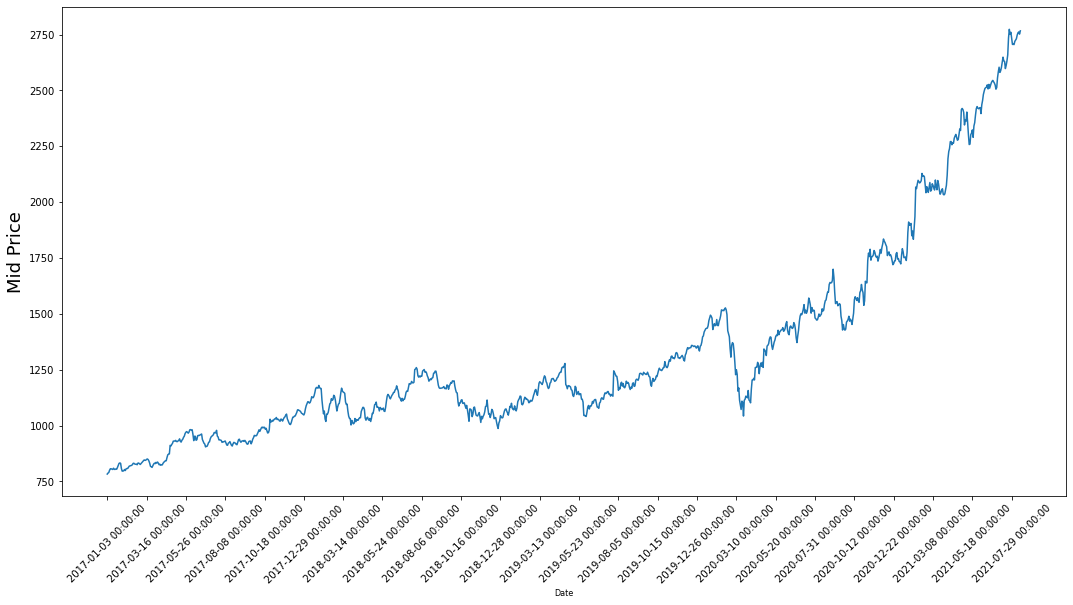

In [ ]:
df = df.sort_values('Date')

plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date',fontsize=8)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
# Splitting data into test and train
index=int(0.8*len(df['Date'].loc[:]))

train_data = df.iloc[:index, 1:2].values
test_data = df.iloc[index:, 1:2].values

total_data = df.iloc[:,1:2].values

print("Train data: ",len(train_data))
print("Test data: ",len(test_data))
print("Total data: ",len(total_data))

Train data:  929
Test data:  233
Total data:  1162


In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_data)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(869, 50, 1)


In [ ]:
dataset_train = df.iloc[:index, 1:2]
dataset_test = df.iloc[index:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, len(dataset_test)+60):
    X_test.append(inputs[i-50:i, 0])
    Y_test.append(inputs[i,0])
X_test,Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(233, 50, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the LSTM
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
28/28 [==============================] - 10s 101ms/step - loss: 0.0324
Epoch 2/100
28/28 [==============================] - 3s 104ms/step - loss: 0.0073
Epoch 3/100
28/28 [==============================] - 3s 101ms/step - loss: 0.0068
Epoch 4/100
28/28 [==============================] - 3s 102ms/step - loss: 0.0064
Epoch 5/100
28/28 [==============================] - 3s 102ms/step - loss: 0.0058
Epoch 6/100
28/28 [==============================] - 3s 103ms/step - loss: 0.0053
Epoch 7/100
28/28 [==============================] - 3s 103ms/step - loss: 0.0051
Epoch 8/100
28/28 [==============================] - 3s 102ms/step - loss: 0.0051
Epoch 9/100
28/28 [==============================] - 3s 103ms/step - loss: 0.0042
Epoch 10/100
28/28 [==============================] - 3s 105ms/step - loss: 0.0041
Epoch 11/100
28/28 [==============================] - 3s 106ms/step - loss: 0.0041
Epoch 12/100
28/28 [==============================] - 3s 102ms/step - loss: 0.0044
Epoch 13/100

In [ ]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,Y_test))

28/28 [==============================] - 3s 29ms/step - loss: 7.7439e-04
0.0007743948372080922
8/8 [==============================] - 0s 26ms/step - loss: 0.0270
0.02702847681939602


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

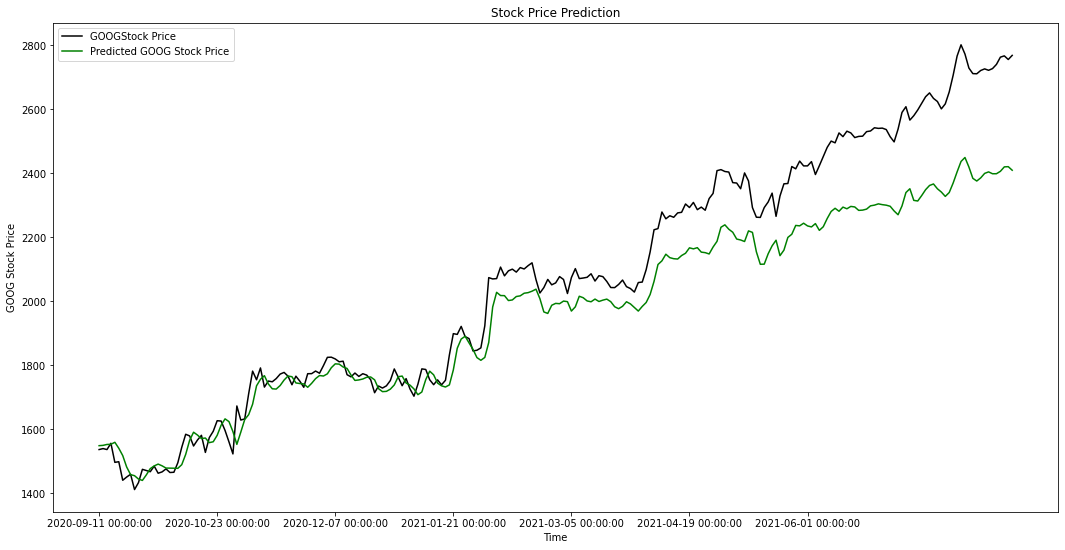

In [ ]:
# Visualising the results
plt.figure(figsize = (18,9))
plt.plot(df.loc[index:, 'Date'],dataset_test.values, color = 'black', label = company+'Stock Price')
plt.plot(df.loc[index:, 'Date'],predicted_stock_price, color = 'green', label = 'Predicted '+company+' Stock Price')
plt.xticks(np.arange(0,200,30))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(company+' Stock Price')
plt.legend()
plt.show()

In [ ]:
#Getting RMSE
rmse=np.sqrt(np.mean(((predicted_stock_price-dataset_test.values)**2)))
print("Root mean square error is: ",rmse)

Root mean square error is:  153.04374244277736


In [ ]:
#Mean absolute percentage error
mape=np.mean(np.abs((predicted_stock_price-dataset_test.values)/dataset_test.values))*100
print("Mean absolute percentage error is: ",mape)

Mean absolute percentage error is:  4.864574675339644


#Stock price prediction with related companies

Using related stocks historic data along with the targeted company to get better results


In [ ]:
#company=input("Enter stock name: ")
company="GOOG"
if company in ordered_companies:
  index=str(ordered_companies.index(company))
  similar_companies=embed_model.wv.most_similar(index)
  print("Related companies are-")
  for comp in similar_companies:
    stock=ordered_companies[int(comp[0])]
    similarity=comp[1]
    print(stock,similarity)
else:
  print("Company not valid option, pls select from these: ", ordered_companies) 

Related companies are-
LLY 0.3899253010749817
ALB 0.38187676668167114
TAP 0.3784782290458679
ES 0.3714468479156494
CNP 0.36066192388534546
MCO 0.3353883922100067
ROL 0.3322245180606842
CRM 0.32966965436935425
KR 0.3246668875217438
PYPL 0.31469690799713135


In [ ]:
average=[0 for i in range(len(test_data)+len(train_data))]

for comp in similar_companies:
  sc_new = MinMaxScaler(feature_range = (0, 1))
  stock=ordered_companies[int(comp[0])]
  print(stock)
  df = pd.read_excel('/content/drive/MyDrive/Major_Project/Trade_data.xls',sheet_name=stock)
  print(df)

  df_scaled_new = sc_new.fit_transform(df.iloc[:,1:2].values)
  for i in range(len(df_scaled_new)):
    average[i]+=df_scaled_new[i][0]
  print(df_scaled_new)

for i in range(len(df_scaled_new)):
  df_scaled_new[i][0]=average[i]/10

average=df_scaled_new
print("Final",average)

LLY
                     Date        Open  ...   Adj Close   Volume
0     2017-01-03 00:00:00   73.940002  ...   67.191345  3622700
1     2017-01-04 00:00:00   74.949997  ...   67.299454  3021600
2     2017-01-05 00:00:00   74.930000  ...   68.083023  3310800
3     2017-01-06 00:00:00   75.459999  ...   68.155090  2296500
4     2017-01-09 00:00:00   75.669998  ...   68.695488  3204100
...                   ...         ...  ...         ...      ...
1157  2021-08-09 00:00:00  264.579987  ...  266.300171  3238500
1158  2021-08-10 00:00:00  266.750000  ...  268.582794  2060200
1159  2021-08-11 00:00:00  269.589996  ...  263.250000  2813300
1160  2021-08-12 00:00:00  263.200012  ...  263.470001  2100900
1161  2021-08-13 00:00:00  263.149994  ...  264.209991  1482300

[1162 rows x 7 columns]
[[0.        ]
 [0.00516225]
 [0.00506005]
 ...
 [1.        ]
 [0.96733972]
 [0.96708407]]
ALB
                     Date        Open  ...   Adj Close   Volume
0     2017-01-03 00:00:00   87.150002  ...   

In [ ]:
sc=MinMaxScaler(feature_range = (0, 1))
scaled_target=sc.fit_transform(dataset_total)
final_array=[]
for i in range(len(scaled_target)):
  final_array.append([average[i][0],scaled_target[i][0]])
final_array=np.array(final_array)
print(final_array,len(final_array))

[[0.24967486 0.        ]
 [0.24888127 0.00472442]
 [0.25152926 0.00359651]
 ...
 [0.83335915 0.98290299]
 [0.82808744 0.97726341]
 [0.8315182  0.9836401 ]] 1162


In [ ]:
index=int(0.8*len(final_array))

train_data = final_array[:index]
test_data = final_array[index:]

total_data = final_array[:]

print("Train data: ",len(train_data))
print("Test data: ",len(test_data))
print("Total data: ",len(total_data))

Train data:  929
Test data:  233
Total data:  1162


In [ ]:
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-50:i])
    y_train.append(train_data[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
print(X_train.shape)

(869, 50, 2)


In [ ]:
inputs = total_data[len(total_data) - len(test_data) - 60:]
X_test = []
Y_test = []
for i in range(60, len(test_data)+60):
    X_test.append(inputs[i-50:i])
    Y_test.append(inputs[i,1])
X_test,Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
print(X_test.shape)

(233, 50, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
28/28 [==============================] - 11s 106ms/step - loss: 0.0094
Epoch 2/100
28/28 [==============================] - 3s 105ms/step - loss: 0.0021
Epoch 3/100
28/28 [==============================] - 3s 109ms/step - loss: 0.0018
Epoch 4/100
28/28 [==============================] - 3s 106ms/step - loss: 0.0014
Epoch 5/100
28/28 [==============================] - 3s 107ms/step - loss: 0.0013
Epoch 6/100
28/28 [==============================] - 3s 109ms/step - loss: 0.0012
Epoch 7/100
28/28 [==============================] - 3s 108ms/step - loss: 0.0014
Epoch 8/100
28/28 [==============================] - 3s 107ms/step - loss: 0.0012
Epoch 9/100
28/28 [==============================] - 3s 106ms/step - loss: 0.0011
Epoch 10/100
28/28 [==============================] - 3s 108ms/step - loss: 0.0011
Epoch 11/100
28/28 [==============================] - 3s 106ms/step - loss: 0.0012
Epoch 12/100
28/28 [==============================] - 3s 107ms/step - loss: 0.0010
Epoch 13/100

In [ ]:
print(regressor.evaluate(X_train,y_train))
print(regressor.evaluate(X_test,Y_test))

28/28 [==============================] - 3s 29ms/step - loss: 1.6858e-04
0.00016858105664141476
8/8 [==============================] - 0s 27ms/step - loss: 6.2206e-04
0.0006220625946298242


In [ ]:
related_predicted_stock_price = regressor.predict(X_test)
related_predicted_stock_price = sc.inverse_transform(related_predicted_stock_price)

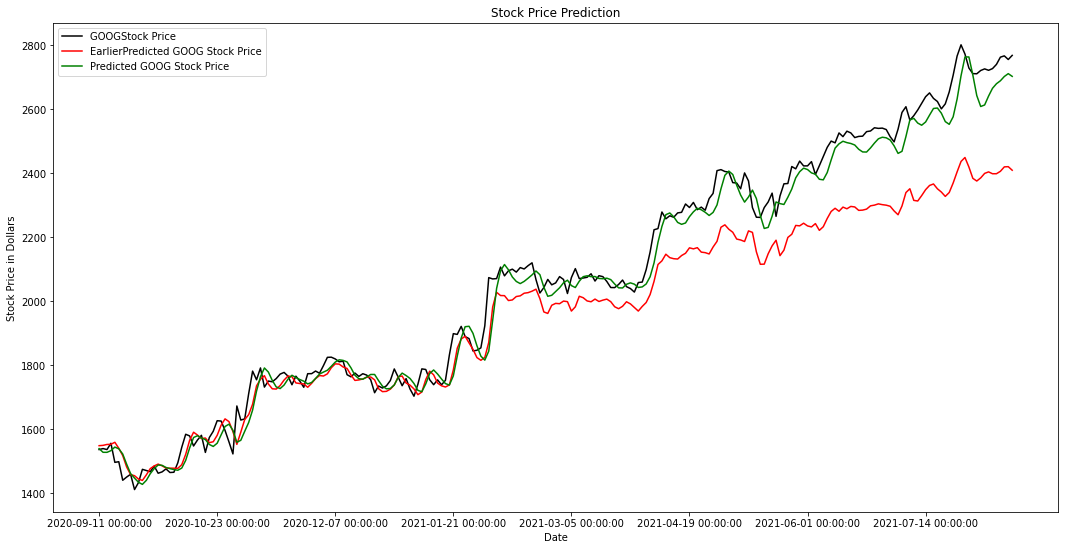

In [ ]:
# Visualising the results
plt.figure(figsize = (18,9))
plt.plot(df.loc[index:, 'Date'],dataset_test.values, color = 'black', label = company+'Stock Price')
plt.plot(df.loc[index:, 'Date'],predicted_stock_price, color = 'red', label = 'EarlierPredicted '+company+' Stock Price')
plt.plot(df.loc[index:, 'Date'],related_predicted_stock_price, color = 'green', label = 'Predicted '+company+' Stock Price')
plt.title('Stock Price Prediction')
plt.xticks(np.arange(0,240,30))
plt.xlabel('Date')
plt.ylabel('Stock Price in Dollars')
plt.legend()
plt.savefig('/content/drive/MyDrive/Major_Project/Results.png')
plt.show()

In [ ]:
#Getting RMSE
rmse=np.sqrt(np.mean(((related_predicted_stock_price-dataset_test.values)**2)))
print("Root mean square error is: ",rmse)

Root mean square error is:  50.41635736329846


In [ ]:
#Mean absolute percentage error
mape=np.mean(np.abs((related_predicted_stock_price-dataset_test.values)/dataset_test.values))*100
print("Mean absolute percentage error is: ",mape)

Mean absolute percentage error is:  1.8547043427672063
